# Project - Predicting Rate of Interest

##### Submitted To: Er. Ritika Sharma, Er. Madhu Anand

##### Submitted By: 
Ashish Bansal, Raghav  
(MAU18UCS001), (MAU18UCS032)

## Introduction

Loans are the core business of banks. The main profit comes directly from the loan’s interest. The loan companies grant a loan after an intensive process of verification and validation. 
In this project, we’ll build a model to predict the rate of Interest for the loan given the features about the applicant and the loan itself.  
The supervised machine learning algorithms used are Linear Regression, Random Forest

## Technology Stack:
Jupyter Notebook  
Python  
Pandas   
NumPy  
Seaborn  
Matplotlib  
SKLearn  
Pickle  

### Importing Libraries and Files

In [1]:
import pandas as pd #### used for dataframe manipulations
import numpy as np
import seaborn as sns ### plotting
import matplotlib.pyplot as plt ### plotting

In [2]:
train_file='loan_data_train.csv'
test_file='loan_data_test.csv'

ld_train=pd.read_csv(train_file)
ld_test=pd.read_csv(test_file)               

In [3]:
ld_train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [4]:
ld_test.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years


### Sanity check

In [5]:

### 1. Check for logical dependency - True
### 2. Check for data adequacy - False (neglect)

ld_train.shape, ld_test.shape

((2200, 15), (300, 14))

### EDA AND PREPROCESSING

In [6]:
###### data types in the column

ld_train.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [7]:
#### Insights ####

# ID could be removed ##### Unwanted column!
# Amount.Requested should have been a numeric column, check for the reasons for it being a object column and convert it to numeric
# Interest rate column remove the % sign and check if that converts the column to numeric 
# Loan length do a bit of analysis
# Loan Purpose (Truly object) - convert it to numeric
# Debt to Income ratio - Remove the % sign and convert to numeric 
# State (Turly object) - Convert to numeric
# Home Ownership (Truly Object) - Convert to numeric
# Fico range - Convert into a numeric column
# Open credit lines - Convert to numeric
# Revolving credit balance. - Convert to numeric
# Employment length - Convert to numeric

### Combining data for Data Prep

In [8]:
# lets combine the data for data prep

ld_test['Interest.Rate']= np.nan

ld_train['data']='train'

ld_test['data']='test'

ld_test=ld_test[ld_train.columns] ### reordering the columns of test dataset in the order of train dataset

ld_all=pd.concat([ld_train,ld_test],axis=0) ### row wise concatenation

In [9]:
ld_all.shape, ld_train.shape, ld_test.shape

((2500, 16), (2200, 16), (300, 16))

In [10]:
ld_all.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,data
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,train
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,train
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,train
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,train
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,train


In [11]:
ld_all.tail()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,data
295,24675.0,12000,11975,NaN,60 months,home_improvement,13.91%,NV,MORTGAGE,7083.33,705-709,7,3923,2.0,7 years,test
296,69456.0,5000,5000,NaN,36 months,debt_consolidation,17.22%,CA,OWN,4000.00,705-709,10,6023,0.0,10+ years,test
297,97954.0,4375,4375,NaN,36 months,credit_card,9.09%,CA,RENT,2916.67,670-674,9,6944,2.0,6 years,test
298,36931.0,13600,13600,NaN,60 months,credit_card,12.85%,MN,RENT,5651.33,675-679,13,24383,0.0,10+ years,test
299,34744.0,6000,6000,NaN,36 months,debt_consolidation,7.64%,IL,MORTGAGE,5184.75,675-679,8,14422,0.0,2 years,test


In [12]:
ld_all.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
dtype: object

## Performing Preprocessing

In [13]:
# ID,Amount.Funded.By.Investors : drop 
# Interest Rate , Debt to income ratio : remove % and then to numeric
# Amount.Requested , 'Open.CREDIT.Lines','Revolving.CREDIT.Balance': convert it to numeric 
# FICO.Range : replace it by a numeric column which is average of the range
# Employment Length : convert to number
# Loan Lenth, Loan Purpose , State , Home ownership: dummies for categories with good occurence rate

### Removing unwanted columns

In [14]:
ld_all.drop(['ID'],axis=1,inplace=True)

In [15]:
ld_all.dtypes

Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
dtype: object

### Removing % sign and converting to numeric

In [16]:
for column in ['Interest.Rate','Debt.To.Income.Ratio']:
    ld_all[column] = ld_all[column].str.replace('%', '')

In [17]:
ld_all.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,data
0,25000,25000,18.49,60 months,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,train
1,19750,19750,17.27,60 months,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,train
2,2100,2100,14.33,36 months,major_purchase,3.50,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,train
3,28000,28000,16.29,36 months,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,train
4,24250,17431.82,12.23,60 months,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,train


In [18]:
ld_all.dtypes

Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
dtype: object

### Finding the non numeric elements

In [19]:
def get_non_numeric(series):
  non_numeric_elements = []
  for elem in series:
    try:
      float(elem)
    except:
      non_numeric_elements.append(elem)
  return(non_numeric_elements)

In [20]:
for col in ['Amount.Requested','Amount.Funded.By.Investors', 'Interest.Rate', 
            'Debt.To.Income.Ratio', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance']:
    non_numeric_elems = get_non_numeric(ld_all[col])
    print('*********************************')
    print('Column :', col)
    print('Non numeric elements :', non_numeric_elems)

*********************************
Column : Amount.Requested
Non numeric elements : ['.', '.', '.', '.']
*********************************
Column : Amount.Funded.By.Investors
Non numeric elements : ['.', '.', '.', '.']
*********************************
Column : Interest.Rate
Non numeric elements : []
*********************************
Column : Debt.To.Income.Ratio
Non numeric elements : []
*********************************
Column : Open.CREDIT.Lines
Non numeric elements : ['.', '.', '.', '.', '.']
*********************************
Column : Revolving.CREDIT.Balance
Non numeric elements : ['.', '.']


### Converting non-numeric to numeric

In [21]:
for col in ['Amount.Requested','Amount.Funded.By.Investors',
            'Open.CREDIT.Lines','Revolving.CREDIT.Balance','Interest.Rate','Debt.To.Income.Ratio']:
    ld_all[col]=pd.to_numeric(ld_all[col],errors='coerce')

In [22]:
ld_all.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
dtype: object

### Treating the FICO range column

In [23]:
k = ld_all['FICO.Range'].str.split("-",expand=True)

In [24]:
k

,0,1
0,720,724
1,710,714
2,690,694
3,710,714
4,730,734
...,...,...
295,705,709
296,705,709
297,670,674
298,675,679


In [25]:
k.columns = ['Min_Fico', 'Max_Fico']

k['Min_Fico'] = pd.to_numeric(k['Min_Fico'])
k['Max_Fico'] = pd.to_numeric(k['Max_Fico'])

k['Avg_Fico'] = (k['Min_Fico'] + k['Max_Fico'])/2

In [26]:
k

,Min_Fico,Max_Fico,Avg_Fico
0,720,724,722.0
1,710,714,712.0
2,690,694,692.0
3,710,714,712.0
4,730,734,732.0
...,...,...,...
295,705,709,707.0
296,705,709,707.0
297,670,674,672.0
298,675,679,677.0


In [27]:
ld_all['Fico_Score'] = k['Avg_Fico']

ld_all.drop('FICO.Range',axis=1, inplace=True)

In [28]:
ld_all.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
Fico_Score                        float64
dtype: object

### Treating Home Ownership column

In [29]:
ld_all['Home.Ownership'].value_counts()

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

<AxesSubplot:xlabel='Home.Ownership', ylabel='Interest.Rate'>

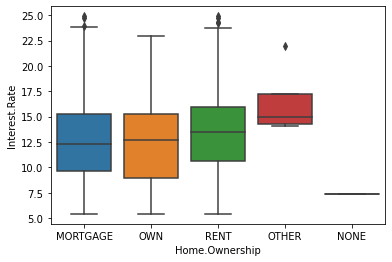

In [30]:
import seaborn as sns

sns.boxplot(y = ld_all.loc[ld_all['data']=='train', 'Interest.Rate'], x= ld_all.loc[ld_all['data']=='train', 'Home.Ownership'])

In [31]:
ld_all['Home.Ownership'].value_counts()

ld_all.loc[ld_all['Home.Ownership'].isin(['OTHER','NONE']),'Home.Ownership'] = 'RENT'

k = pd.get_dummies(ld_all['Home.Ownership'],prefix = 'HO')  ## One Hot Encoding

ld_all.drop(['Home.Ownership'],axis=1,inplace=True) #### del ld_all['Home.Ownership']

ld_all = pd.concat([ld_all,k],axis=1)

In [32]:
ld_all.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
Fico_Score                        float64
HO_MORTGAGE                         uint8
HO_OWN                              uint8
HO_RENT                             uint8
dtype: object

### Treating the Loan Purpose Column

In [33]:
ld_all['Loan.Purpose'].value_counts()

debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

<AxesSubplot:xlabel='Loan.Purpose', ylabel='Interest.Rate'>

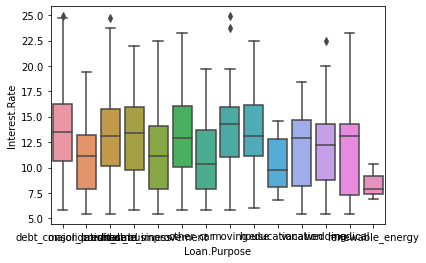

In [34]:
sns.boxplot(y = ld_all.loc[ld_all['data']=='train', 'Interest.Rate'], x= ld_all.loc[ld_all['data']=='train', 'Loan.Purpose'])

In [35]:
ld_all.loc[ld_all['Loan.Purpose']=='renewable_energy', 'Loan.Purpose'] = 'debt_consolidation'

k = pd.get_dummies(ld_all['Loan.Purpose'],prefix ='Loan_purpose')

ld_all.drop(['Loan.Purpose'],axis=1, inplace=True)

ld_all = pd.concat([ld_all,k],axis=1)

In [36]:
ld_all.dtypes

Amount.Requested                   float64
Amount.Funded.By.Investors         float64
Interest.Rate                      float64
Loan.Length                         object
Debt.To.Income.Ratio               float64
State                               object
Monthly.Income                     float64
Open.CREDIT.Lines                  float64
Revolving.CREDIT.Balance           float64
Inquiries.in.the.Last.6.Months     float64
Employment.Length                   object
data                                object
Fico_Score                         float64
HO_MORTGAGE                          uint8
HO_OWN                               uint8
HO_RENT                              uint8
Loan_purpose_car                     uint8
Loan_purpose_credit_card             uint8
Loan_purpose_debt_consolidation      uint8
Loan_purpose_educational             uint8
Loan_purpose_home_improvement        uint8
Loan_purpose_house                   uint8
Loan_purpose_major_purchase          uint8
Loan_purpos

### Treating the Employment length column

In [37]:
ld_all['Employment.Length'].value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: Employment.Length, dtype: int64

<AxesSubplot:xlabel='Employment.Length', ylabel='Interest.Rate'>

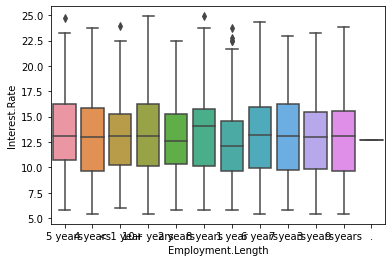

In [38]:
sns.boxplot(y = ld_all.loc[ld_all['data']=='train', 'Interest.Rate'], x= ld_all.loc[ld_all['data']=='train', 'Employment.Length'])

In [39]:
ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('.',"10")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('years',"")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('year',"")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('10\+',"10")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('< 1',"0.5")

ld_all['Employment.Length'] = pd.to_numeric(ld_all['Employment.Length'],errors = 'coerce')

C:\Users\ASHISH~1\AppData\Local\Temp/ipykernel_16884/3529639588.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('.',"10")
C:\Users\ASHISH~1\AppData\Local\Temp/ipykernel_16884/3529639588.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('10\+',"10")


In [40]:
ld_all.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,State,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,...,Loan_purpose_educational,Loan_purpose_home_improvement,Loan_purpose_house,Loan_purpose_major_purchase,Loan_purpose_medical,Loan_purpose_moving,Loan_purpose_other,Loan_purpose_small_business,Loan_purpose_vacation,Loan_purpose_wedding
0,25000.0,25000.00,18.49,60 months,27.56,VA,8606.56,11.0,15210.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,19750.0,19750.00,17.27,60 months,13.39,NY,6737.50,14.0,19070.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,2100.00,14.33,36 months,3.50,LA,1000.00,13.0,893.0,1.0,...,0,0,0,1,0,0,0,0,0,0
3,28000.0,28000.00,16.29,36 months,19.62,NV,7083.33,12.0,38194.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,17431.82,12.23,60 months,23.79,OH,5833.33,6.0,31061.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
ld_all.dtypes

Amount.Requested                   float64
Amount.Funded.By.Investors         float64
Interest.Rate                      float64
Loan.Length                         object
Debt.To.Income.Ratio               float64
State                               object
Monthly.Income                     float64
Open.CREDIT.Lines                  float64
Revolving.CREDIT.Balance           float64
Inquiries.in.the.Last.6.Months     float64
Employment.Length                  float64
data                                object
Fico_Score                         float64
HO_MORTGAGE                          uint8
HO_OWN                               uint8
HO_RENT                              uint8
Loan_purpose_car                     uint8
Loan_purpose_credit_card             uint8
Loan_purpose_debt_consolidation      uint8
Loan_purpose_educational             uint8
Loan_purpose_home_improvement        uint8
Loan_purpose_house                   uint8
Loan_purpose_major_purchase          uint8
Loan_purpos

In [42]:
categorical_columns = ld_all.select_dtypes(['object']).columns

In [43]:
categorical_columns

Index(['Loan.Length', 'State', 'data'], dtype='object')

In [44]:
ld_all.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,State,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,...,Loan_purpose_educational,Loan_purpose_home_improvement,Loan_purpose_house,Loan_purpose_major_purchase,Loan_purpose_medical,Loan_purpose_moving,Loan_purpose_other,Loan_purpose_small_business,Loan_purpose_vacation,Loan_purpose_wedding
0,25000.0,25000.00,18.49,60 months,27.56,VA,8606.56,11.0,15210.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,19750.0,19750.00,17.27,60 months,13.39,NY,6737.50,14.0,19070.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,2100.00,14.33,36 months,3.50,LA,1000.00,13.0,893.0,1.0,...,0,0,0,1,0,0,0,0,0,0
3,28000.0,28000.00,16.29,36 months,19.62,NV,7083.33,12.0,38194.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,17431.82,12.23,60 months,23.79,OH,5833.33,6.0,31061.0,2.0,...,0,0,0,0,0,0,0,0,0,0


### Treating Loan length column

In [45]:
ld_all['Loan.Length'].value_counts()

36 months    1950
60 months     548
.               1
Name: Loan.Length, dtype: int64

<AxesSubplot:xlabel='Loan.Length', ylabel='Interest.Rate'>

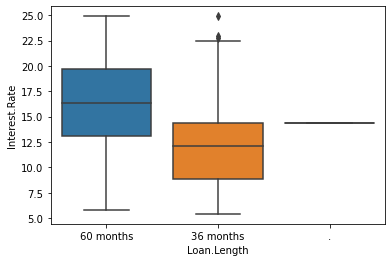

In [46]:
sns.boxplot(y = ld_all.loc[ld_all['data']=='train', 'Interest.Rate'], x= ld_all.loc[ld_all['data']=='train', 'Loan.Length'])

In [47]:
##### Loan.Length column #####

ld_all['Loan.Length'].value_counts()

ld_all.loc[ld_all['Loan.Length']=='.','Loan.Length'] = '36 months'

ld_all['loan_period'] = 0

ld_all.loc[ld_all['Loan.Length']=='60 months','loan_period'] = 1 # Label Encoding

del ld_all['Loan.Length']

In [48]:
ld_all.dtypes

Amount.Requested                   float64
Amount.Funded.By.Investors         float64
Interest.Rate                      float64
Debt.To.Income.Ratio               float64
State                               object
Monthly.Income                     float64
Open.CREDIT.Lines                  float64
Revolving.CREDIT.Balance           float64
Inquiries.in.the.Last.6.Months     float64
Employment.Length                  float64
data                                object
Fico_Score                         float64
HO_MORTGAGE                          uint8
HO_OWN                               uint8
HO_RENT                              uint8
Loan_purpose_car                     uint8
Loan_purpose_credit_card             uint8
Loan_purpose_debt_consolidation      uint8
Loan_purpose_educational             uint8
Loan_purpose_home_improvement        uint8
Loan_purpose_house                   uint8
Loan_purpose_major_purchase          uint8
Loan_purpose_medical                 uint8
Loan_purpos

In [49]:
ld_all.shape

(2500, 29)

In [50]:
ld_all['State'].value_counts()

CA    433
NY    255
TX    174
FL    169
IL    101
GA     97
PA     96
NJ     94
VA     78
MA     73
OH     71
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
AL     38
MN     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
OK     21
KS     21
UT     16
NH     15
RI     15
WV     14
AR     13
NM     13
HI     12
AK     11
DC     11
DE      8
MT      7
VT      5
WY      4
SD      4
IN      3
MS      1
.       1
IA      1
Name: State, dtype: int64

In [51]:
ld_all['State'].nunique()

47

In [52]:
state_freq = ld_all['State'].value_counts()

In [53]:
states_to_consider = list(state_freq.loc[state_freq>50].index)

In [54]:
states_to_consider

['CA',
 'NY',
 'TX',
 'FL',
 'IL',
 'GA',
 'PA',
 'NJ',
 'VA',
 'MA',
 'OH',
 'MD',
 'NC',
 'CO',
 'WA']

<AxesSubplot:xlabel='State', ylabel='Interest.Rate'>

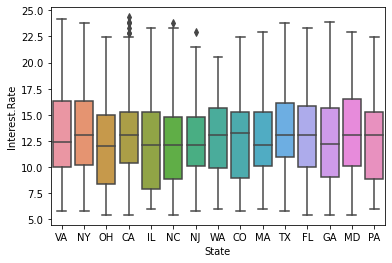

In [55]:
sns.boxplot(y = ld_all.loc[(ld_all['data']=='train') & (ld_all['State'].isin(states_to_consider)), 'Interest.Rate'], 
            x= ld_all.loc[(ld_all['data']=='train') & (ld_all['State'].isin(states_to_consider)), 'State'])

In [56]:
del ld_all['State'] ### Hypothesis testing!!!! (ANOVA)

In [57]:
ld_all.dtypes

Amount.Requested                   float64
Amount.Funded.By.Investors         float64
Interest.Rate                      float64
Debt.To.Income.Ratio               float64
Monthly.Income                     float64
Open.CREDIT.Lines                  float64
Revolving.CREDIT.Balance           float64
Inquiries.in.the.Last.6.Months     float64
Employment.Length                  float64
data                                object
Fico_Score                         float64
HO_MORTGAGE                          uint8
HO_OWN                               uint8
HO_RENT                              uint8
Loan_purpose_car                     uint8
Loan_purpose_credit_card             uint8
Loan_purpose_debt_consolidation      uint8
Loan_purpose_educational             uint8
Loan_purpose_home_improvement        uint8
Loan_purpose_house                   uint8
Loan_purpose_major_purchase          uint8
Loan_purpose_medical                 uint8
Loan_purpose_moving                  uint8
Loan_purpos

### Finding the count of missing values in the dataset

In [58]:
ld_all.isnull().sum()

Amount.Requested                     5
Amount.Funded.By.Investors           5
Interest.Rate                      300
Debt.To.Income.Ratio                 1
Monthly.Income                       3
Open.CREDIT.Lines                    9
Revolving.CREDIT.Balance             5
Inquiries.in.the.Last.6.Months       3
Employment.Length                   78
data                                 0
Fico_Score                           0
HO_MORTGAGE                          0
HO_OWN                               0
HO_RENT                              0
Loan_purpose_car                     0
Loan_purpose_credit_card             0
Loan_purpose_debt_consolidation      0
Loan_purpose_educational             0
Loan_purpose_home_improvement        0
Loan_purpose_house                   0
Loan_purpose_major_purchase          0
Loan_purpose_medical                 0
Loan_purpose_moving                  0
Loan_purpose_other                   0
Loan_purpose_small_business          0
Loan_purpose_vacation    

<AxesSubplot:xlabel='Monthly.Income', ylabel='Count'>

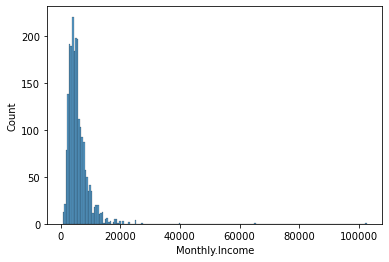

In [59]:
sns.histplot(ld_all.loc[ld_all['data']=='train', 'Monthly.Income'])

In [60]:
a = ld_all.loc[ld_all['data']=='train', 'Monthly.Income'].copy(deep=True)

a[a>20000] = 20000

<AxesSubplot:xlabel='Monthly.Income', ylabel='Count'>

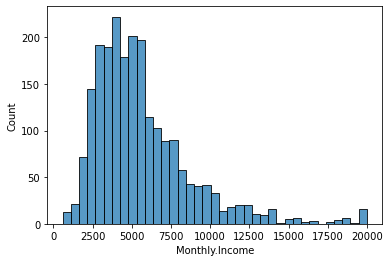

In [61]:
sns.histplot(a)

<AxesSubplot:xlabel='Open.CREDIT.Lines', ylabel='Count'>

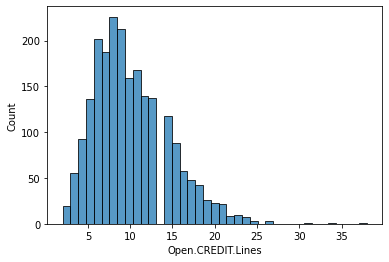

In [62]:
b = ld_all.loc[ld_all['data']=='train', 'Open.CREDIT.Lines'].copy(deep=True)
sns.histplot(b)

<AxesSubplot:xlabel='Revolving.CREDIT.Balance', ylabel='Count'>

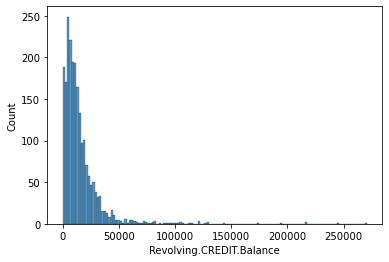

In [63]:
c = ld_all.loc[ld_all['data']=='train', 'Revolving.CREDIT.Balance'].copy(deep=True)
sns.histplot(c)

<AxesSubplot:xlabel='Amount.Requested', ylabel='Count'>

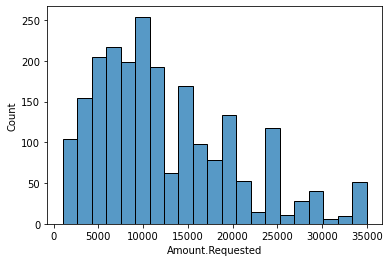

In [64]:
d = ld_all.loc[ld_all['data']=='train', 'Amount.Requested'].copy(deep=True)
sns.histplot(d)

### Treating Missing Values

In [65]:
for col in ld_all.columns:
    if (col not in ['Interest.Rate','data'])&(ld_all[col].isnull().sum()>0):
      mean_val = ld_all.loc[ld_all['data']=='train',col].mean() ## computing only using training
      ld_all.loc[ld_all[col].isnull(),col] = mean_val  ### replacing both train and test

In [66]:
ld_all.isnull().sum()

Amount.Requested                     0
Amount.Funded.By.Investors           0
Interest.Rate                      300
Debt.To.Income.Ratio                 0
Monthly.Income                       0
Open.CREDIT.Lines                    0
Revolving.CREDIT.Balance             0
Inquiries.in.the.Last.6.Months       0
Employment.Length                    0
data                                 0
Fico_Score                           0
HO_MORTGAGE                          0
HO_OWN                               0
HO_RENT                              0
Loan_purpose_car                     0
Loan_purpose_credit_card             0
Loan_purpose_debt_consolidation      0
Loan_purpose_educational             0
Loan_purpose_home_improvement        0
Loan_purpose_house                   0
Loan_purpose_major_purchase          0
Loan_purpose_medical                 0
Loan_purpose_moving                  0
Loan_purpose_other                   0
Loan_purpose_small_business          0
Loan_purpose_vacation    

### Outliers Detection

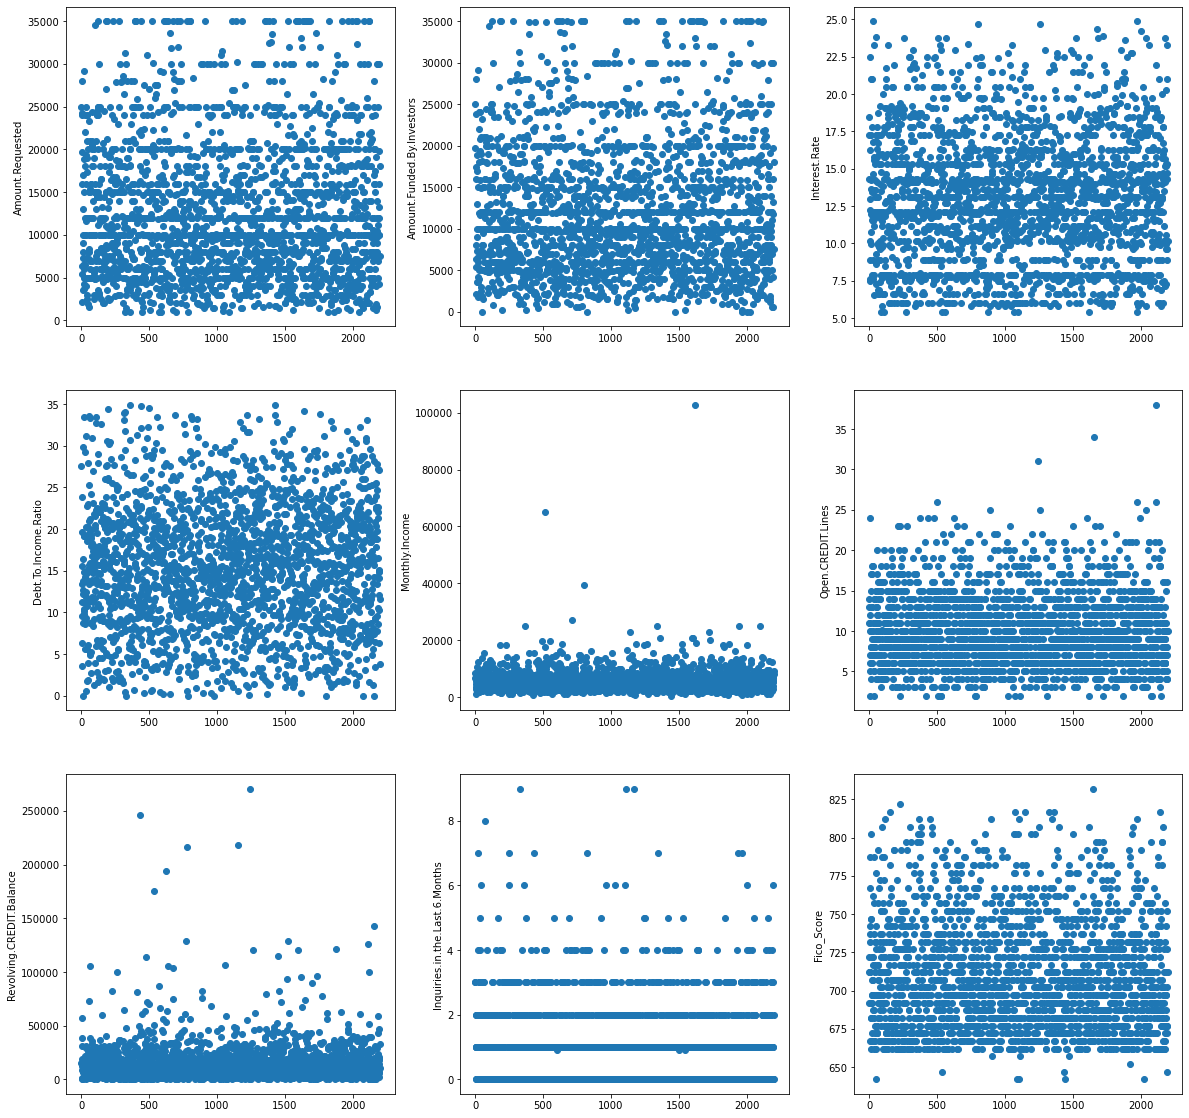

In [67]:
###### Finding outliers ##########

#### Visualizing numeric columns ######

genuine_numeric_cols = ['Amount.Requested', 'Amount.Funded.By.Investors','Interest.Rate', 'Debt.To.Income.Ratio',
                        'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
                        'Inquiries.in.the.Last.6.Months', 'Fico_Score']

numeric_cols = ld_all.loc[ld_all['data']=='train',genuine_numeric_cols] ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 3
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

In [68]:
##### Monthly Income outlier treatment ####

### Lets find it ####

ld_all.loc[(ld_all['data']=='train') & (ld_all['Monthly.Income']>60000),:]

###### Dropping the row with unusually high monthly income #####

ld_all.drop([516,1621],axis=0,inplace=True)
#ld_all.drop([516],axis=0,inplace=True)
#ld_all.loc[ld_all['Monthly.Income']>40000,'Monthly.Income'] = 40000

In [69]:
####### Converting all monthly incomes greater than 20000 to 20000  ######

ld_all.loc[(ld_all['Monthly.Income']>20000) & (ld_all['data']=='train'), 'Monthly.Income'] = 20000

In [70]:
###### Open Credit lines outlier treatment ######

#### Lets find it #####

ld_all.loc[ld_all['Open.CREDIT.Lines']>25, 'Open.CREDIT.Lines'] = 25

In [71]:
###### Resolving Credit Balance ####

#ld_all.loc[ld_all['data']=='train','Revolving.CREDIT.Balance'].quantile(0.99)

ld_all.loc[ld_all['Revolving.CREDIT.Balance']>=150000,'Revolving.CREDIT.Balance'] = 150000

#ld_all.loc[ld_all['data']=='train','Revolving.CREDIT.Balance'].max()

#### After Outlier Treatment

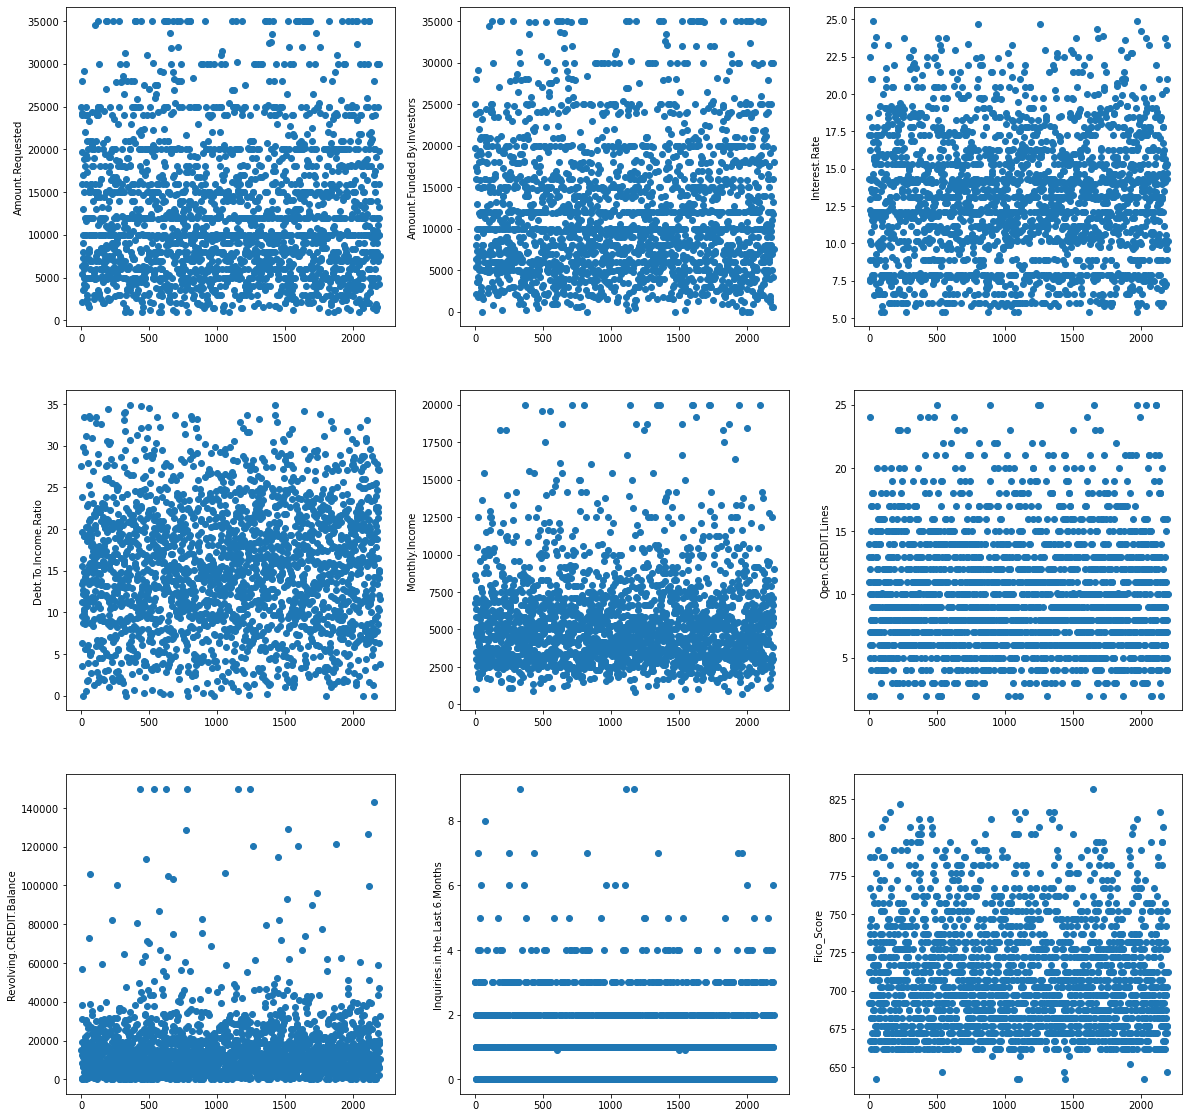

In [72]:
###### After outliers resolving ##########

#### Visualizing numeric columns ######

genuine_numeric_cols = ['Amount.Requested', 'Amount.Funded.By.Investors','Interest.Rate', 'Debt.To.Income.Ratio',
                        'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
                        'Inquiries.in.the.Last.6.Months', 'Fico_Score']

numeric_cols = ld_all.loc[ld_all['data']=='train',genuine_numeric_cols] ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 3
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

#### Finding Correlation

In [73]:
##### find the correlations ######

#### High corrlation between target variable and features (good thing)
#### High correlation among features (bad) 

#numeric_cols.corr() ### features with >0.9 <-0.9 (remove one of these features)

genuine_numeric_cols = ['Amount.Requested', 'Amount.Funded.By.Investors','Interest.Rate', 'Debt.To.Income.Ratio',
                        'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
                        'Inquiries.in.the.Last.6.Months', 'Fico_Score']

numeric_cols_new = ld_all.loc[ld_all['data']=='train', genuine_numeric_cols]

numeric_cols_new.corr()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico_Score
Amount.Requested,1.000000,0.965730,0.331535,0.074808,0.458949,0.193694,0.295463,-0.011945,0.080636
Amount.Funded.By.Investors,0.965730,1.000000,0.337063,0.088717,0.435256,0.184722,0.272483,-0.054854,0.069824
Interest.Rate,0.331535,0.337063,1.000000,0.175800,0.041657,0.087860,0.071775,0.170431,-0.708310
Debt.To.Income.Ratio,0.074808,0.088717,0.175800,1.000000,-0.171116,0.370323,0.197440,0.011041,-0.223266
Monthly.Income,0.458949,0.435256,0.041657,-0.171116,1.000000,0.230452,0.415090,0.037614,0.112827
Open.CREDIT.Lines,0.193694,0.184722,0.087860,0.370323,0.230452,1.000000,0.289214,0.110235,-0.092155
Revolving.CREDIT.Balance,0.295463,0.272483,0.071775,0.197440,0.415090,0.289214,1.000000,0.005407,-0.008711
Inquiries.in.the.Last.6.Months,-0.011945,-0.054854,0.170431,0.011041,0.037614,0.110235,0.005407,1.000000,-0.090466
Fico_Score,0.080636,0.069824,-0.708310,-0.223266,0.112827,-0.092155,-0.008711,-0.090466,1.000000


In [74]:
###### Insight ######
#### Amount Requested and Amount Funded by Investors have very high correlation so one of them can be dropped
#### My model should be able to identify FICO SCore as a very important variable!!!

<AxesSubplot:>

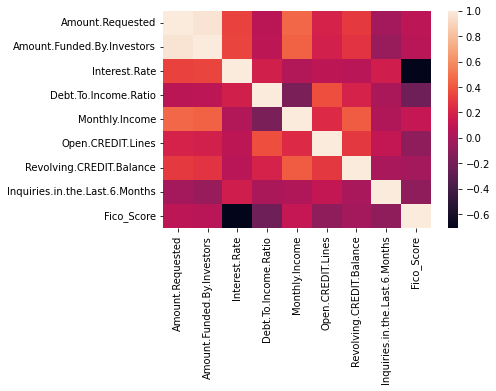

In [75]:
sns.heatmap(numeric_cols.corr())

In [76]:
########### Remove Amount.Funded.By.Investor #########

ld_all.drop(['Amount.Funded.By.Investors'], axis=1, inplace=True)

In [77]:
ld_all.shape

(2498, 27)

#### Segregation of Training and Testing DataSet

In [78]:
#### Seggregate the train and test back ######

ld_train = ld_all.loc[ld_all['data']=='train']

del ld_train['data']

ld_test = ld_all.loc[ld_all['data']=='test']

ld_test.drop(['Interest.Rate','data'],axis=1,inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [79]:
ld_test.shape, ld_train.shape

((300, 25), (2198, 26))

In [80]:
del ld_all

### Saving preprocessed data in .csv files

In [81]:
pd.DataFrame(ld_train).to_csv("loan_data_train_preprocessed.csv",index=False)
pd.DataFrame(ld_test).to_csv("loan_data_test_preprocessed.csv",index=False)

## Modelling

### Importing Libraries and Data Files

In [82]:
import pandas as pd #### used for dataframe manipulations
import numpy as np
import seaborn as sns ### plotting
import matplotlib.pyplot as plt ### plotting
from sklearn.model_selection import train_test_split ### Help me to split the data into train and validation

In [83]:
train_file='loan_data_train_preprocessed.csv'
test_file='loan_data_test_preprocessed.csv'

ld_train=pd.read_csv(train_file)
ld_test=pd.read_csv(test_file) 

### Splitting data into training and validation sets

In [84]:
## Splitting into training and validation sets

ld_new_train, ld_val = train_test_split(ld_train, test_size=0.2, random_state = 100) ### random_state ensures we get the exact same split all the time

In [85]:
ld_new_train.shape, ld_val.shape

((1758, 26), (440, 26))

In [86]:
#### train_features - all columns from the train dataframe except the target column
#### train_targets - the target column from the train set
ld_new_train

,Amount.Requested,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Fico_Score,HO_MORTGAGE,...,Loan_purpose_home_improvement,Loan_purpose_house,Loan_purpose_major_purchase,Loan_purpose_medical,Loan_purpose_moving,Loan_purpose_other,Loan_purpose_small_business,Loan_purpose_vacation,Loan_purpose_wedding,loan_period
636,8800.0,18.25,13.89,2916.67,5.0,7794.0,2.0,2.0,687.0,0,...,0,0,0,0,0,0,0,0,0,1
785,4500.0,7.51,13.90,3000.00,10.0,387.0,0.0,0.5,767.0,1,...,0,0,0,0,1,0,0,0,0,0
723,35000.0,15.23,22.74,10000.00,13.0,13651.0,1.0,10.0,762.0,1,...,0,0,1,0,0,0,0,0,0,1
1142,5950.0,12.12,21.54,5000.00,9.0,47746.0,0.0,10.0,692.0,1,...,0,0,0,0,0,0,0,0,0,0
1064,9000.0,6.03,5.87,8333.33,9.0,1717.0,0.0,1.0,777.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,21000.0,20.50,18.42,8083.33,11.0,31080.0,2.0,5.0,682.0,1,...,0,0,0,0,0,0,0,0,0,1
1930,12000.0,16.29,5.07,2916.67,13.0,10360.0,2.0,5.0,672.0,1,...,1,0,0,0,0,0,0,0,0,0
79,7000.0,7.40,8.89,3352.00,14.0,14014.0,2.0,0.5,772.0,1,...,0,0,0,0,0,0,0,0,0,0
1859,24000.0,21.00,23.69,6500.00,17.0,36555.0,3.0,6.0,687.0,1,...,0,0,0,0,0,0,0,0,0,1


In [87]:
# Notice that only train data is used for imputing missing values in both train and test 

train_features = ld_new_train.drop('Interest.Rate',axis=1) ## this contains features for train

train_targets = ld_new_train['Interest.Rate'] ### this contains the actual value for train set

val_features = ld_val.drop('Interest.Rate',axis=1) ### this contains features for validation set

val_targets = ld_val['Interest.Rate']  ### this contains validation target

### Linear Regression

Linear regression is used for finding linear relationship between target and one or more predictors.  
The representation of linear regression is an equation that describes a line that best fits the relationship between the input variables (x) and the output variables (y), by finding specific weightings for the input variables called coefficients (B).

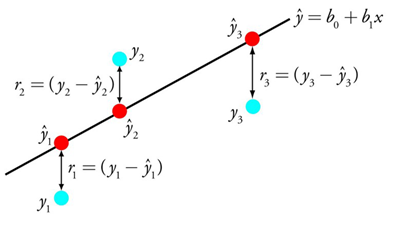

In [88]:
from IPython import display
display.Image("linear regression diagram.png")

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lm = LinearRegression()
lm.fit(X = train_features,y = train_targets) ### fitting of model

LinearRegression()

In [91]:
model_parameters = dict(zip(train_features.columns, lm.coef_))

In [92]:
model_parameters

{'Amount.Requested': 0.00016628100039946646,
 'Debt.To.Income.Ratio': 0.0010899829437262143,
 'Monthly.Income': -4.5186359456722374e-05,
 'Open.CREDIT.Lines': -0.03024780962091429,
 'Revolving.CREDIT.Balance': -4.477985320292726e-06,
 'Inquiries.in.the.Last.6.Months': 0.34638758062711583,
 'Employment.Length': 0.0010994143779091234,
 'Fico_Score': -0.08678517808638786,
 'HO_MORTGAGE': -2.925121418659639,
 'HO_OWN': -2.6621829215418433,
 'HO_RENT': -2.734759590503697,
 'Loan_purpose_car': -0.36958631315821283,
 'Loan_purpose_credit_card': -0.4943792874471934,
 'Loan_purpose_debt_consolidation': -0.48027473334096593,
 'Loan_purpose_educational': 0.1149608464533633,
 'Loan_purpose_home_improvement': -0.43907299574096775,
 'Loan_purpose_house': 0.3694167933363561,
 'Loan_purpose_major_purchase': 0.03683273473342951,
 'Loan_purpose_medical': -0.47142433062933914,
 'Loan_purpose_moving': 1.2671089450177015,
 'Loan_purpose_other': 0.5684627975299474,
 'Loan_purpose_small_business': 0.04457478

### Evaluating the performance of Linear Regression model

In [93]:
##### Evaluate the performance of the fitted model #####

train_predictions = lm.predict(train_features) ### predict on the train features using the fitted model

val_predictions = lm.predict(val_features) ### predict on the val features using the fitted model

In [94]:
train_predictions.shape, val_predictions.shape

((1758,), (440,))

### Visual Evalutaion

In [95]:
from sklearn.metrics import classification_report

In [96]:
interest_rate = pd.DataFrame({'Actual Value': val_targets, 'Predicted Value': val_predictions})

In [97]:
interest_rate

,Actual Value,Predicted Value
1663,10.99,12.268235
1699,10.38,10.385273
960,17.27,17.892829
1434,15.80,14.919358
1634,14.96,16.030650
...,...,...
1299,18.55,16.050420
1915,6.76,3.467260
2137,21.00,19.423777
900,10.75,11.254088


<AxesSubplot:>

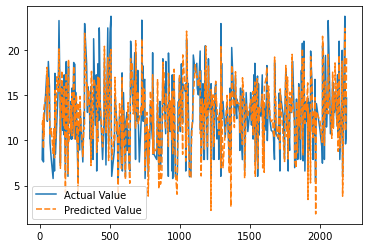

In [98]:
sns.lineplot(data=interest_rate)

### Tests to evaluate the Model

In [99]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(val_targets, val_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(val_targets, val_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_targets, val_predictions)))

Mean Absolute Error: 1.5768904534092851
Mean Squared Error: 4.100960303860727
Root Mean Squared Error: 2.025082789384357


#### Mean absolute percentage error
Mean Absolute Percentage Error (MAPE) is a statistical measure to define the accuracy of a machine learning algorithm on a particular dataset.


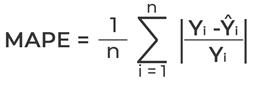

In [100]:
from IPython import display
display.Image("mape image.png")

In [101]:
def MAPE(target_vector, predicted_vector):
  abs_error = np.absolute(target_vector - predicted_vector)
  percent_abs_error = (abs_error/target_vector)*100
  mean_abs_percentage_error = np.mean(percent_abs_error)
  return(mean_abs_percentage_error)

In [102]:

train_MAPE_LR = MAPE(train_targets,train_predictions)

val_MAPE_LR = MAPE(val_targets,val_predictions)

print('Train MAPE : ',train_MAPE_LR)

print('Val MAPE : ',val_MAPE_LR)


Train MAPE :  13.7149947896308
Val MAPE :  13.673083660063863


#### R-Square Test
R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.

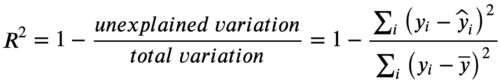

In [103]:
from IPython import display
display.Image("r square.jpg")

In [104]:
from sklearn.metrics import r2_score 

r_square_train_LR = r2_score(train_targets,train_predictions)
r_square_validation_LR = r2_score(val_targets, val_predictions)

In [105]:
r_square_train_LR

0.7622736201342017

In [106]:
r_square_validation_LR

0.7590175941100415

In [107]:
####### Save the model #####

##### Models are saved in something known as pickle file ########
import pickle
with open('My_linear_regression_model.pickle', 'wb')  as f: ##### wb indictes open the file in write mode
    pickle.dump(lm, f)

## Random Forest

Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.  
Put simply: random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

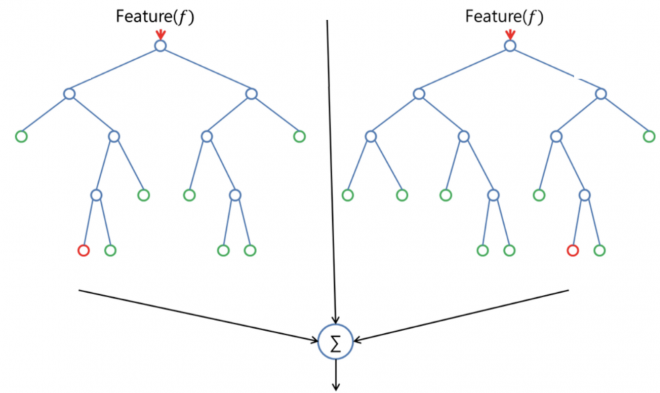

In [108]:
from IPython import display
display.Image("random forest.png")

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
regressor = RandomForestRegressor(n_estimators=25, random_state=5)
regressor.fit(train_features, train_targets)

RandomForestRegressor(n_estimators=25, random_state=5)

### Evaluating the performance of model

In [111]:
##### Evaluate the performance of the fitted model #####

train_predictions = regressor.predict(train_features) ### predict on the train features using the fitted model

val_predictions = regressor.predict(val_features) ### predict on the val features using the fitted model

In [112]:
train_predictions.shape, val_predictions.shape

((1758,), (440,))

### Visual Evalutaion

In [113]:
from sklearn.metrics import classification_report

In [114]:
interest_rate = pd.DataFrame({'Actual Value': val_targets, 'Predicted Value': val_predictions})

In [115]:
interest_rate

,Actual Value,Predicted Value
1663,10.99,12.4576
1699,10.38,10.7052
960,17.27,20.2764
1434,15.80,17.1984
1634,14.96,15.5992
...,...,...
1299,18.55,16.9668
1915,6.76,6.4684
2137,21.00,19.3680
900,10.75,10.5988


<AxesSubplot:>

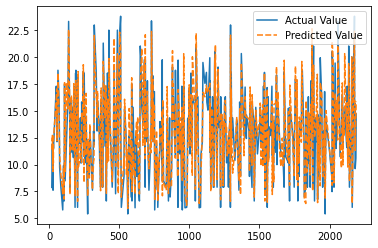

In [116]:
sns.lineplot(data=interest_rate)

### Tests to evaluate the Model

In [117]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(val_targets, val_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(val_targets, val_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_targets, val_predictions)))

Mean Absolute Error: 1.27816
Mean Squared Error: 2.9136379505454544
Root Mean Squared Error: 1.7069381800596806


### MAPE

In [118]:
def MAPE(target_vector, predicted_vector):
  abs_error = np.absolute(target_vector - predicted_vector)
  percent_abs_error = (abs_error/target_vector)*100
  mean_abs_percentage_error = np.mean(percent_abs_error)
  return(mean_abs_percentage_error)

In [119]:

train_MAPE_RF = MAPE(train_targets,train_predictions)

val_MAPE_RF = MAPE(val_targets,val_predictions)

print('Train MAPE : ',train_MAPE_RF)

print('Val MAPE : ',val_MAPE_RF)


Train MAPE :  4.391043540214417
Val MAPE :  10.667688741858269


### R Square Test

In [120]:
from sklearn.metrics import r2_score 

r_square_train_RF = r2_score(train_targets,train_predictions)
r_square_validation_RF = r2_score(val_targets, val_predictions)

In [121]:
r_square_train_RF

0.9675984260753204

In [122]:
r_square_validation_RF

0.8287875445773696

In [123]:
####### Save the model #####

##### Models are saved in something known as pickle file ########
import pickle
with open('My_random_forest_model.pickle', 'wb')  as f: ##### wb indictes open the file in write mode
    pickle.dump(lm, f)

### Comparison between Linear Regression and Random Forest

In [124]:
data = [(train_MAPE_LR, train_MAPE_RF),(val_MAPE_LR, val_MAPE_RF),(r_square_train_LR, r_square_train_RF),(r_square_validation_LR, r_square_train_RF)]

In [125]:
comp = pd.DataFrame(data, columns = ['Linear Regression', 'Random Forest'], index = ['Train Data Mape Score', 'Validation Data Mape', 'Train Data R Square Score', 'Validation Data R Square Score'])

In [126]:
comp

,Linear Regression,Random Forest
Train Data Mape Score,13.714995,4.391044
Validation Data Mape,13.673084,10.667689
Train Data R Square Score,0.762274,0.967598
Validation Data R Square Score,0.759018,0.967598


## Making Prediction Using Model

In [127]:
test_pred = regressor.predict(ld_test)

In [128]:
test_pred

array([16.1992, 16.6016, 10.5136,  6.2936, 14.5732,  6.8348, 16.6276,
        8.66  , 15.2984, 11.422 , 10.556 , 15.6844, 10.3868, 14.6576,
       13.5744, 19.5836,  8.7016, 17.082 , 14.9628, 14.9632, 21.9896,
       16.8504, 11.436 , 15.6036,  8.0216,  8.842 , 13.04  , 20.2688,
       12.5888, 16.7088, 15.888 , 16.7064, 12.9208, 15.6508, 13.8296,
       14.3   , 19.6764,  9.764 , 11.6116, 16.544 , 13.8304, 10.82  ,
       14.1052, 13.5468, 18.2396, 17.9608, 13.69  , 14.99  , 17.3136,
       11.0152, 13.7804, 18.2012,  9.646 , 20.1524, 14.3412, 13.6088,
       18.2248, 16.3216,  9.0952, 15.6664, 13.0904, 17.0872,  7.2436,
       15.912 ,  8.8164, 11.2248, 13.23  , 14.5424,  9.9452, 14.0996,
       14.06  , 19.6872, 22.512 , 22.0816, 13.7016, 17.3   ,  9.3412,
       10.4544, 17.0108,  9.0132, 17.59  ,  9.7556,  8.2788, 12.9924,
       12.2756,  8.724 ,  9.3784, 15.506 ,  9.4436, 10.9456, 10.4956,
       16.6648, 12.7752, 19.558 , 11.8572,  9.4604,  9.2328, 16.4112,
       17.252 , 14.2

In [129]:
ld_test.insert(0, "Interest Rate", test_pred)

In [130]:
ld_test

,Interest Rate,Amount.Requested,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Fico_Score,HO_MORTGAGE,...,Loan_purpose_home_improvement,Loan_purpose_house,Loan_purpose_major_purchase,Loan_purpose_medical,Loan_purpose_moving,Loan_purpose_other,Loan_purpose_small_business,Loan_purpose_vacation,Loan_purpose_wedding,loan_period
0,16.1992,5000.0,12.59,4416.67,13.0,7686.0,0.0,0.5,692.0,0,...,0,0,0,0,1,0,0,0,0,1
1,16.6016,18000.0,4.93,5258.50,6.0,11596.0,0.0,10.0,712.0,0,...,0,0,0,0,0,0,0,0,0,1
2,10.5136,7200.0,25.16,3750.00,13.0,7283.0,0.0,6.0,752.0,1,...,0,0,0,0,0,0,0,0,0,1
3,6.2936,7200.0,17.27,3416.67,14.0,4838.0,0.0,10.0,792.0,1,...,0,0,0,0,0,0,0,0,0,0
4,14.5732,22000.0,18.28,6083.33,9.0,20181.0,0.0,8.0,722.0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,14.3772,12000.0,13.91,7083.33,7.0,3923.0,2.0,7.0,707.0,1,...,1,0,0,0,0,0,0,0,0,1
296,9.1288,5000.0,17.22,4000.00,10.0,6023.0,0.0,10.0,707.0,0,...,0,0,0,0,0,0,0,0,0,0
297,14.6324,4375.0,9.09,2916.67,9.0,6944.0,2.0,6.0,672.0,0,...,0,0,0,0,0,0,0,0,0,0
298,18.4016,13600.0,12.85,5651.33,13.0,24383.0,0.0,10.0,677.0,0,...,0,0,0,0,0,0,0,0,0,1


In [131]:
pd.DataFrame(ld_test).to_csv("loan_data_test_preprocessed.csv",index=False)